#**Exploratory Data Analysis (EDA) on Iris Dataset**

##**Introduction**
###The Iris dataset is a widely used dataset in the field of machine learning and statistics. It contains measurements of iris flowers, including sepal length, sepal width, petal length, and petal width, along with their corresponding species. In this notebook, we perform exploratory data analysis (EDA) to gain insights into the dataset's characteristics and relationships between features.
**Setup and Libraries**
We start by importing the necessary libraries for data analysis and visualization, including pandas, seaborn, matplotlib, and scikit-learn's PCA module.

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

###**Data Loading and Preprocessing**
We load the Iris dataset from a CSV file and perform basic data preprocessing steps, such as checking dimensions, column names, and summary statistics.

In [29]:
path_to_csv = "D:\\Khushi\\EDA on iris dataset\\Iris.csv"
iris_df = pd.read_csv(path_to_csv)

print("Dimensions of the dataset:")
print("Number of rows:", iris_df.shape[0])
print("Number of columns:", iris_df.shape[1])

print("\nColumn names (features):")
print(iris_df.columns)

print("\nFirst few rows of the dataset:")
print(iris_df.head())

summary_stats = iris_df.describe()

print("Summary statistics for numerical columns:")
print(summary_stats)

Dimensions of the dataset:
Number of rows: 150
Number of columns: 6

Column names (features):
Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

First few rows of the dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
Summary statistics for numerical columns:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368     

##**Exploratory Data Analysis**
###**Histograms**
We visualize the distribution of each numerical feature using histograms.

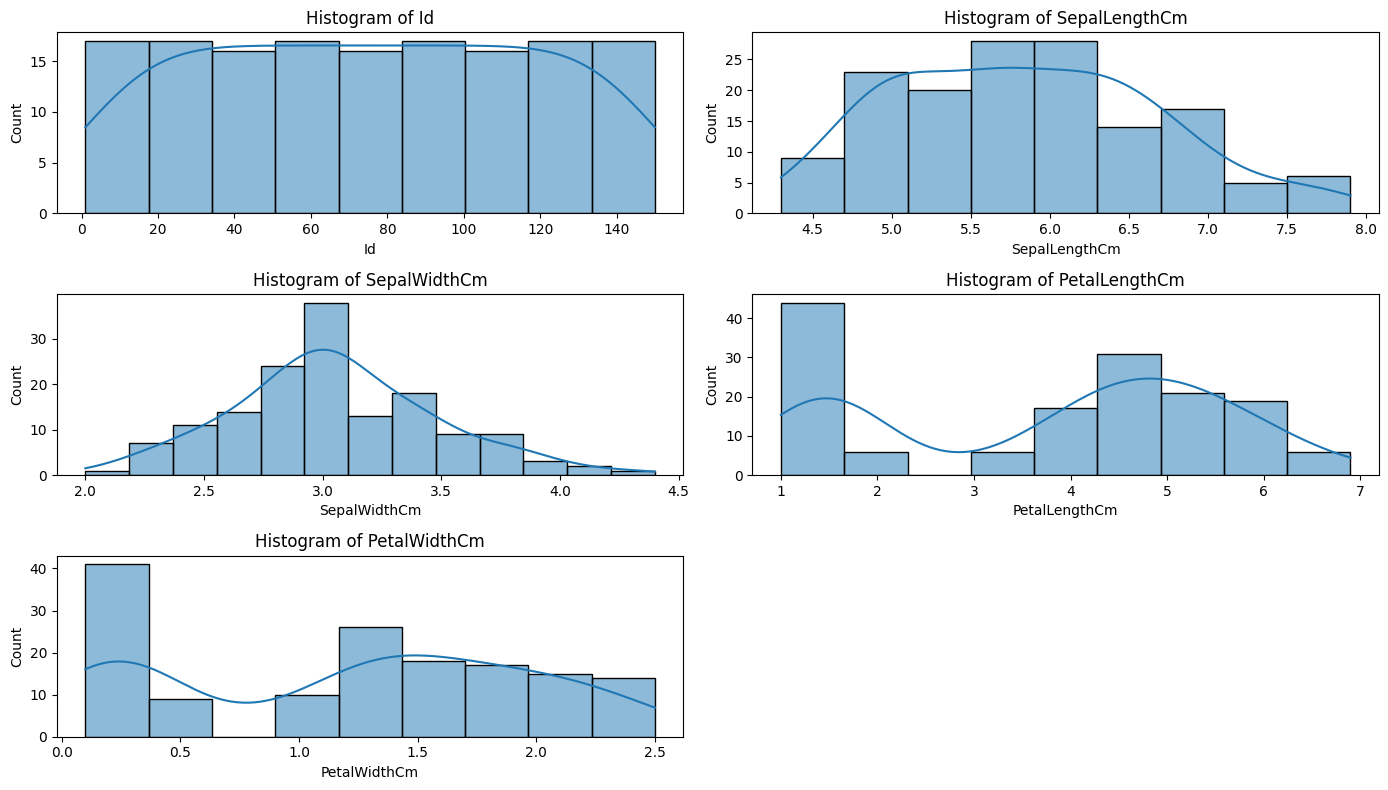

In [30]:
plt.figure(figsize=(14, 8))  
num_cols = 2  
num_rows = (len(iris_df.columns) - 1) // num_cols + 1  

for i, col in enumerate(iris_df.columns[:-1]):
    plt.subplot(num_rows, num_cols, i+1)
    sns.histplot(data=iris_df, x=col, kde=True)
    plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

###**Box Plots**
We use box plots to visualize the distribution and identify outliers in each numerical feature.

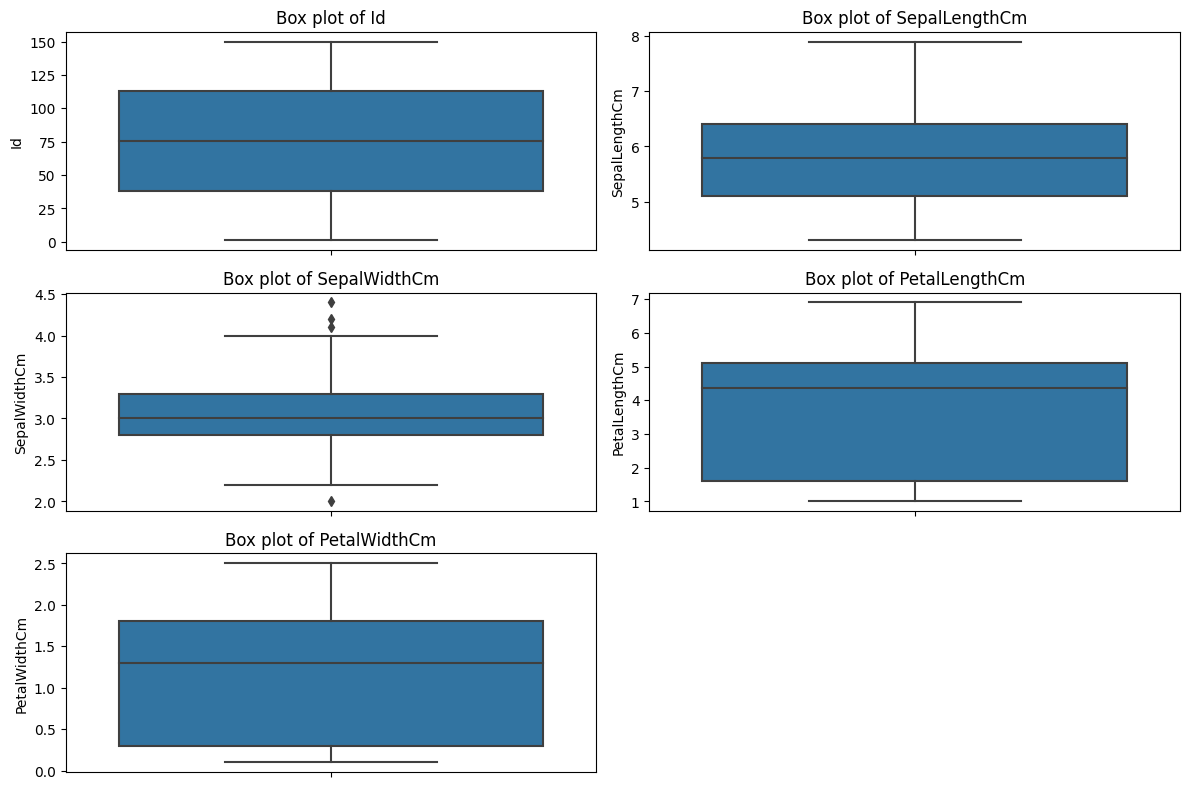

In [31]:
num_cols = len(iris_df.columns[:-1])  
num_rows = (num_cols + 1) // 2  

plt.figure(figsize=(12, 8))
for i, col in enumerate(iris_df.columns[:-1]):
    plt.subplot(num_rows, 2, i+1)
    sns.boxplot(data=iris_df, y=col)
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

###**Pairwise Relationships**
We explore pairwise relationships between numerical features using scatter plots, color-coded by species.

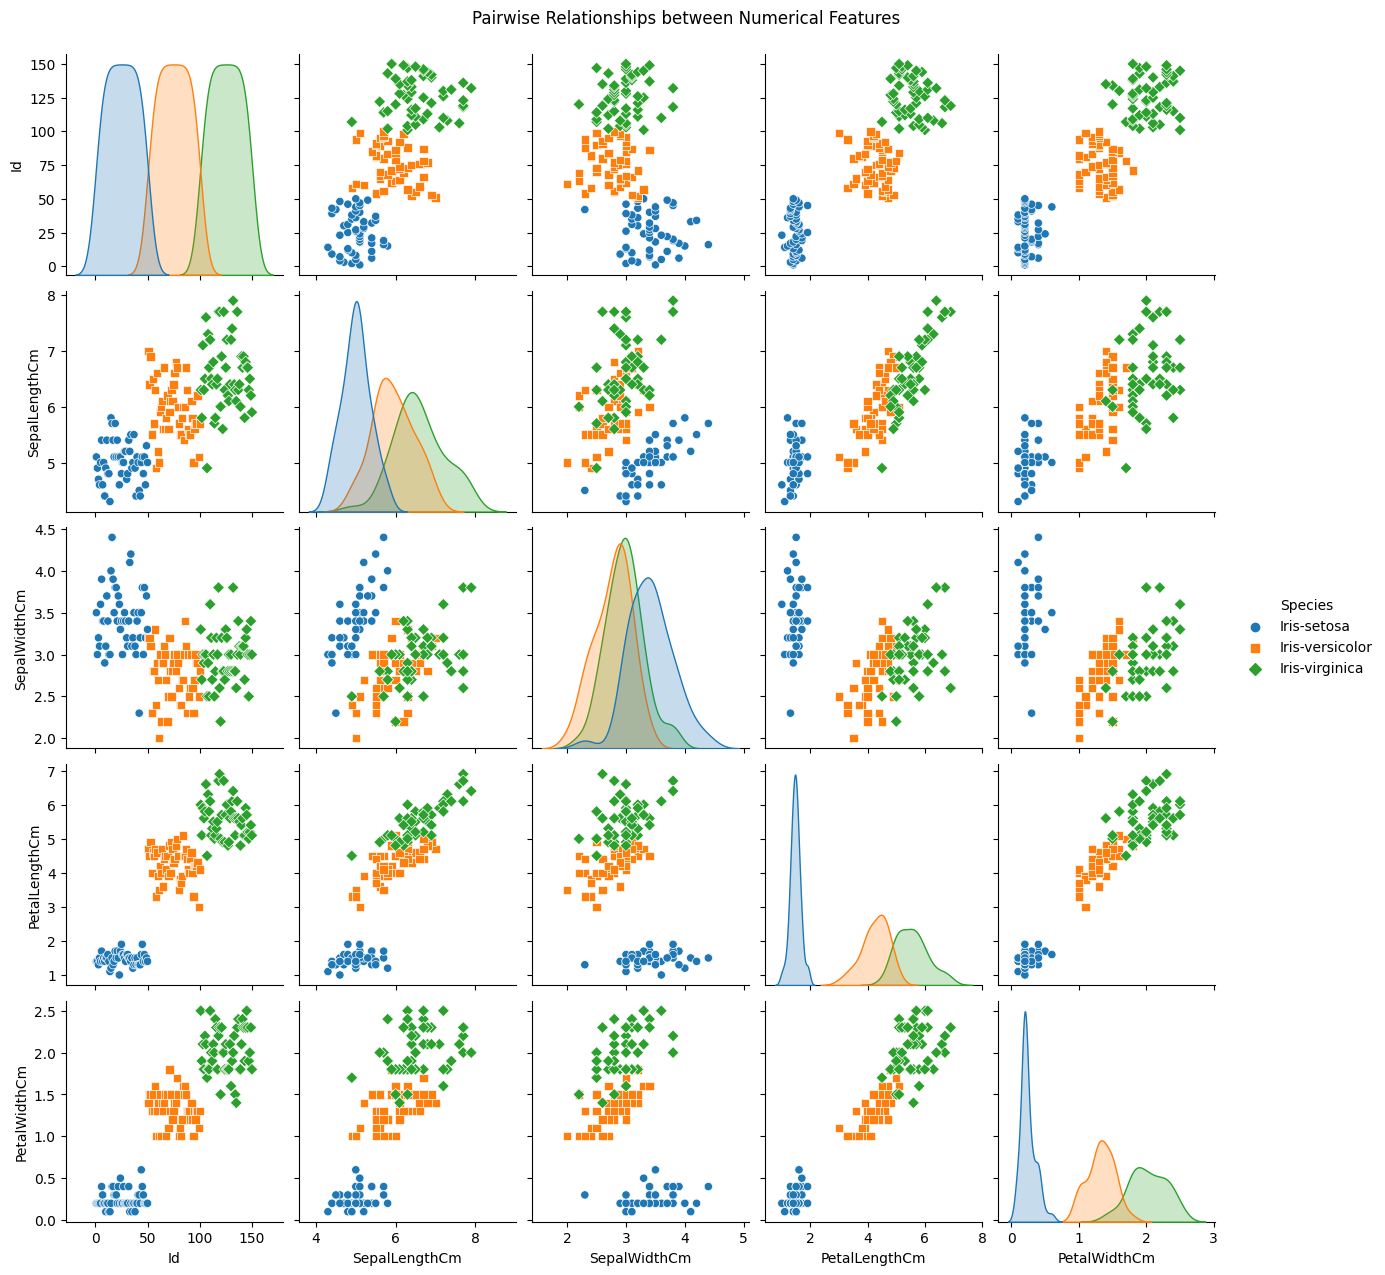

In [32]:
#Scatter plots for pairwise relationships
sns.pairplot(iris_df, hue='Species', markers=['o', 's', 'D'], diag_kind='kde')
plt.suptitle('Pairwise Relationships between Numerical Features', y=1.02)
plt.show()

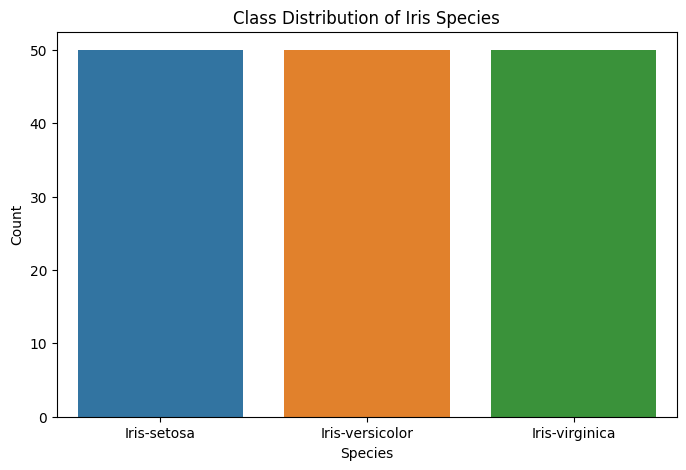

In [34]:
#Class distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=iris_df, x='Species')
plt.title('Class Distribution of Iris Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

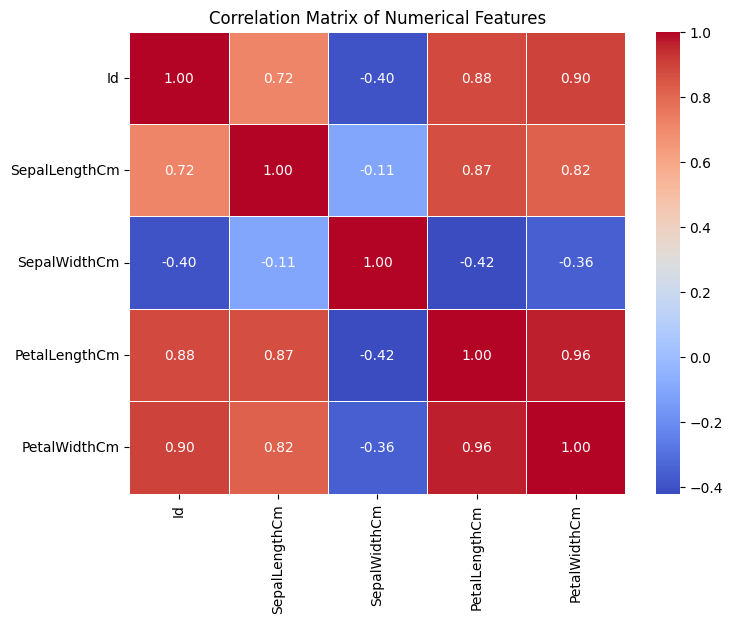

In [33]:
correlation_matrix = iris_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

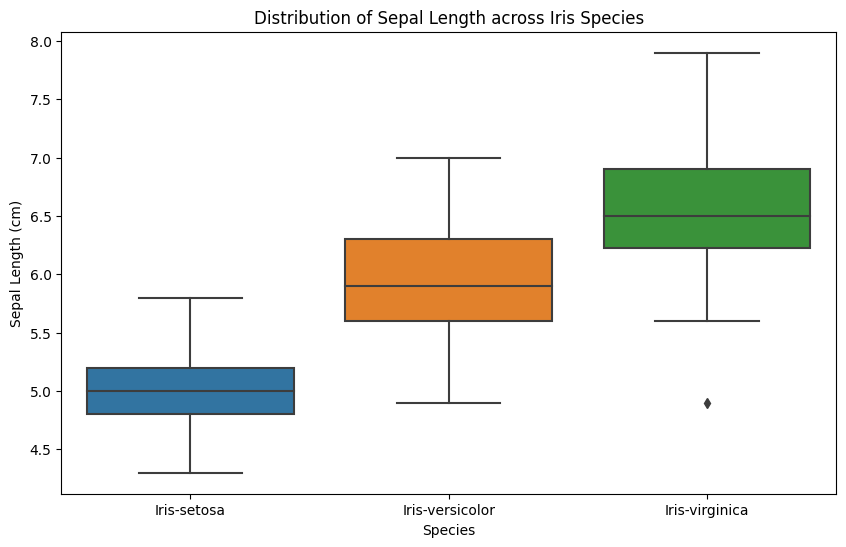

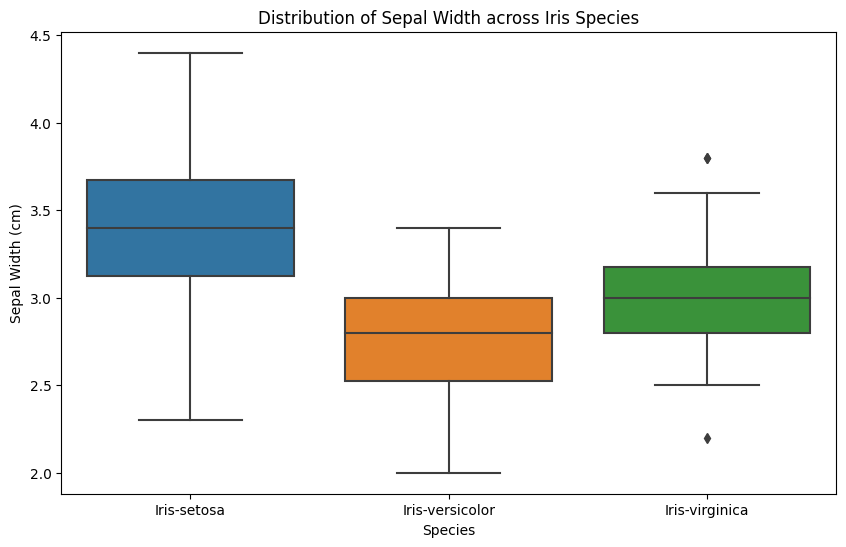

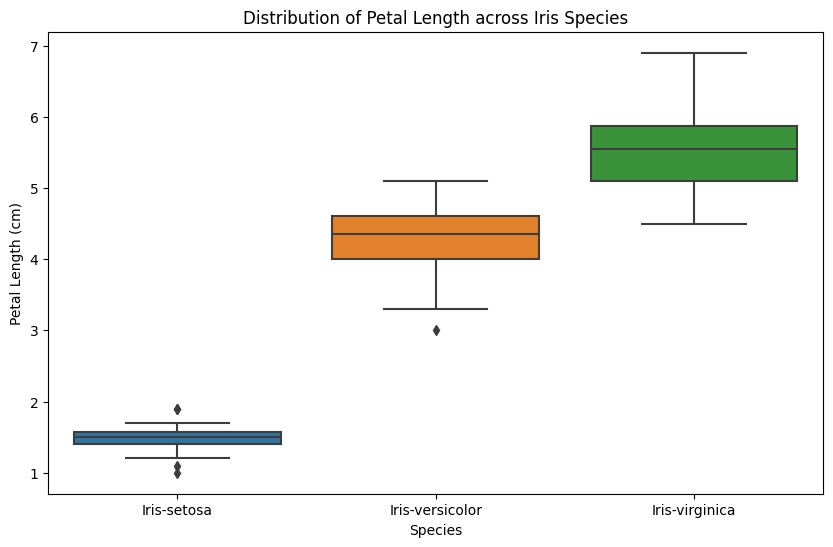

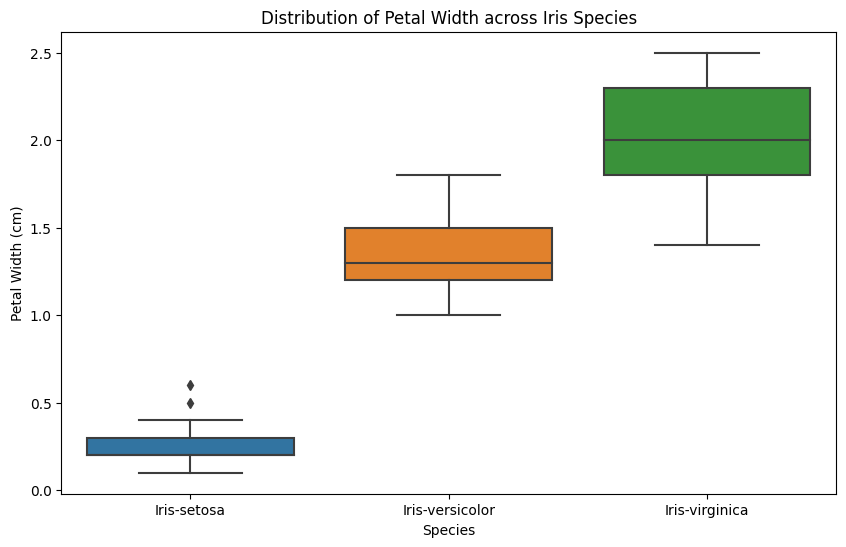

In [35]:
#Box plots to visualize feature insights
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_df, x='Species', y='SepalLengthCm')
plt.title('Distribution of Sepal Length across Iris Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_df, x='Species', y='SepalWidthCm')
plt.title('Distribution of Sepal Width across Iris Species')
plt.xlabel('Species')
plt.ylabel('Sepal Width (cm)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_df, x='Species', y='PetalLengthCm')
plt.title('Distribution of Petal Length across Iris Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_df, x='Species', y='PetalWidthCm')
plt.title('Distribution of Petal Width across Iris Species')
plt.xlabel('Species')
plt.ylabel('Petal Width (cm)')
plt.show()

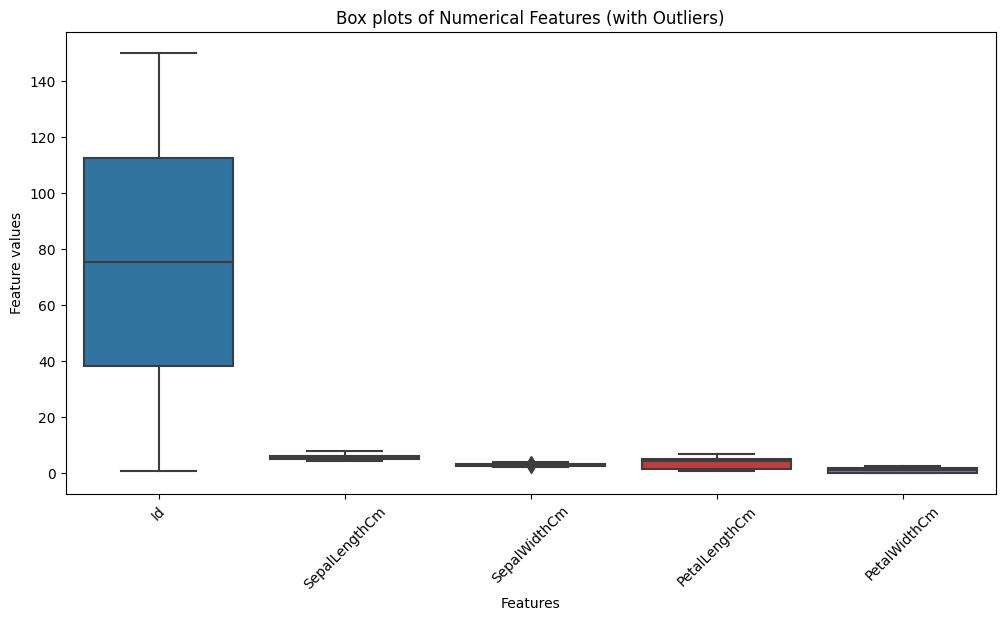

In [36]:
#Box plots to visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=iris_df.drop(columns='Species'))
plt.title('Box plots of Numerical Features (with Outliers)')
plt.ylabel('Feature values')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.show()

###**Principal Component Analysis (PCA)**
We perform dimensionality reduction using PCA to visualize the data in lower dimensions.

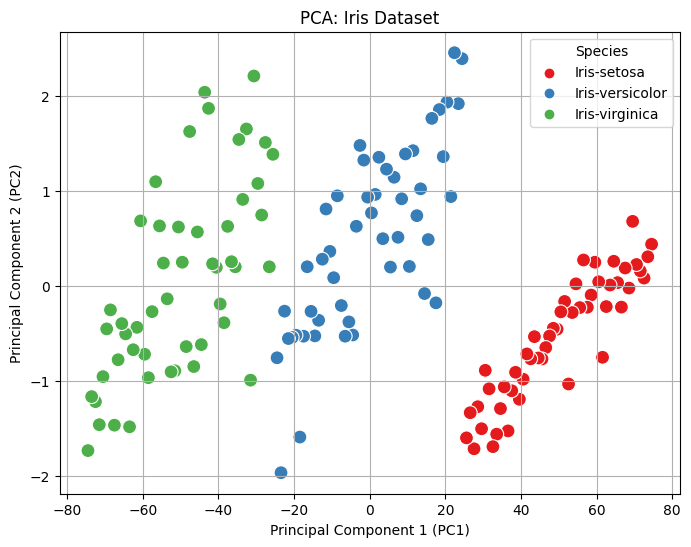

In [37]:
#Separating features and target variable
X = iris_df.drop(columns='Species')
y = iris_df['Species']

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

#DataFrame for the reduced features
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Species'] = y

#Visualizing the data in lower dimensions
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Species', palette='Set1', s=100)
plt.title('PCA: Iris Dataset')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='Species')
plt.grid(True)
plt.show()

In [38]:
class_distribution = iris_df['Species'].value_counts()
correlation_matrix = iris_df.corr()

print("Final Insights from EDA on Iris Dataset:")
print("=======================================")
print("\nSummary Statistics:")
print(summary_stats)
print("\nClass Distribution:")
print(class_distribution)
print("\nCorrelation Matrix:")
print(correlation_matrix)

Final Insights from EDA on Iris Dataset:

Summary Statistics:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

Class Distribution:
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Correlation Matrix:
                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.3

##**Conclusion**
###Through exploratory data analysis, we have gained insights into the characteristics and relationships within the Iris dataset. Further analysis and modeling can be performed based on these insights to develop predictive models or classification algorithms.